In [10]:
# !pip install uproot awkward mpl_scatter_density jupyter-dash zfit
import uproot, scipy, math, os, random, time, pickle, collections
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import awkward as ak
from tqdm import tqdm
import pandas as pd
from scipy import stats
from scipy.spatial.distance import cdist
from scipy.stats import iqr
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
ff_101302 = uproot.open('/global/u2/a/agarabag/pscratch/alignment_samples/skimmed_xaod_ntuple_101302.root')
ff_101301 = uproot.open('/global/u2/a/agarabag/pscratch/alignment_samples/skimmed_xaod_ntuple_101301.root')
ff_210002 = uproot.open('/global/u2/a/agarabag/pscratch/alignment_samples/skimmed_xaod_ntuple_210002.root')
ff_110001 = uproot.open('/global/u2/a/agarabag/pscratch/alignment_samples/skimmed_xaod_ntuple_110001.root')
ff_110007 = uproot.open('/global/u2/a/agarabag/pscratch/alignment_samples/skimmed_xaod_ntuple_110007.root')
ff_101101 = uproot.open('/global/u2/a/agarabag/pscratch/alignment_samples/skimmed_xaod_ntuple_101101.root')
ff_200001 = uproot.open('/global/u2/a/agarabag/pscratch/alignment_samples/skimmed_xaod_ntuple_200001.root')
ff_210001 = uproot.open('/global/u2/a/agarabag/pscratch/alignment_samples/skimmed_xaod_ntuple_210001.root')

In [30]:
Muon_Sample_101302 = ff_101302['tree'].arrays(['nclus0',
                                               'px',
                                               'py',
                                               'pz',
                                               'nclus1',
                                    'nclus2',
                                    'nclus3',
                                    'nclus',], library='ak')
Muon_Sample_101301 = ff_101301['tree'].arrays(['nclus0',
                                               'px',
                                               'py',
                                               'pz',
                                    'nclus1',
                                    'nclus2',
                                    'nclus3',
                                    'nclus',], library='ak')
FLUKA_Plus_Sample_210002 = ff_210002['tree'].arrays(['nclus0',
                                                     'px',
                                               'py',
                                               'pz',
                                    'nclus1',
                                    'nclus2',
                                    'nclus3',
                                    'nclus',], library='ak')
FLUKA_Minus_Sample_210001 = ff_210001['tree'].arrays(['nclus0',
                                                      'px',
                                               'py',
                                               'pz',
                                    'nclus1',
                                    'nclus2',
                                    'nclus3',
                                    'nclus',], library='ak')
Foresee_Sample_110001 = ff_110001['tree'].arrays(['nclus0',
                                                  'px',
                                               'py',
                                               'pz',
                                    'nclus1',
                                    'nclus2',
                                    'nclus3',
                                    'nclus',], library='ak')
Forsee_Sample_110007 = ff_110007['tree'].arrays(['nclus0',
                                                'px',
                                               'py',
                                               'pz',
                                    'nclus1',
                                    'nclus2',
                                    'nclus3',
                                    'nclus',], library='ak')
Elec_Sample_101101 = ff_101101['tree'].arrays(['nclus0',
                                               'px',
                                               'py',
                                               'pz',
                                    'nclus1',
                                    'nclus2',
                                    'nclus3',
                                    'nclus',], library='ak')
Nu_Sample_200001 = ff_200001['tree'].arrays(['nclus0',
                                             'px',
                                               'py',
                                               'pz',
                                    'nclus1',
                                    'nclus2',
                                    'nclus3',
                                    'nclus',], library='ak')

In [4]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [35]:
def plot(sample):
    plt.figure(figsize=(8, 6))
    bin=np.linspace(0, 15, 15)
    plt.hist(ak.flatten(sample['nclus0']), histtype='step', bins=bin, linewidth=2, alpha=0.8,  label="Station 0")
    plt.hist(ak.flatten(sample['nclus1']), histtype='step', bins=bin, linewidth=2, alpha=0.8,  label="Station 1")
    plt.hist(ak.flatten(sample['nclus2']), histtype='step', bins=bin, linewidth=2, alpha=0.8,  label="Station 2")
    plt.hist(ak.flatten(sample['nclus3']), histtype='step', bins=bin, linewidth=2, alpha=0.8,  label="Station 3")
    # plt.hist(ak.flatten(sample['nclus']), histtype='step', bins=bin, linewidth=2, alpha=0.8,  label="Sum")

    plt.xlabel('Number of Measurements', fontsize=18)
    plt.ylabel('Count', fontsize=18)
    plt.legend(fontsize=14)
    plt.xticks(fontsize=15)
    plt.title(namestr(sample,  globals())[0], fontsize=22)
    plt.show()

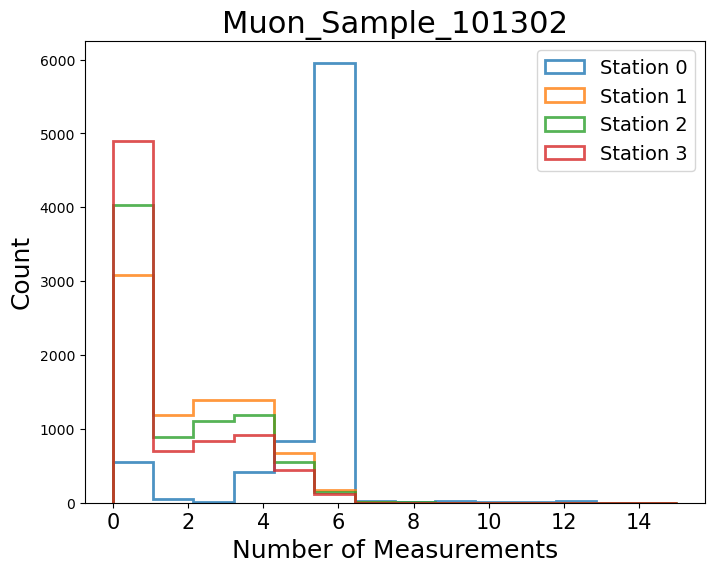

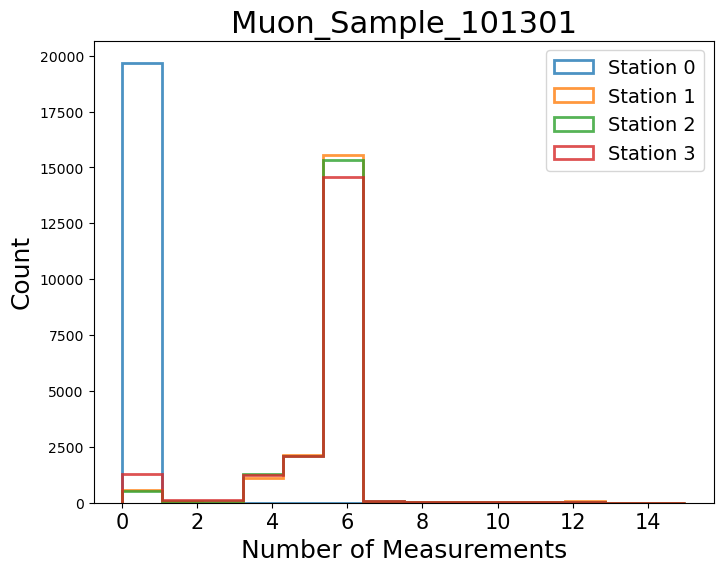

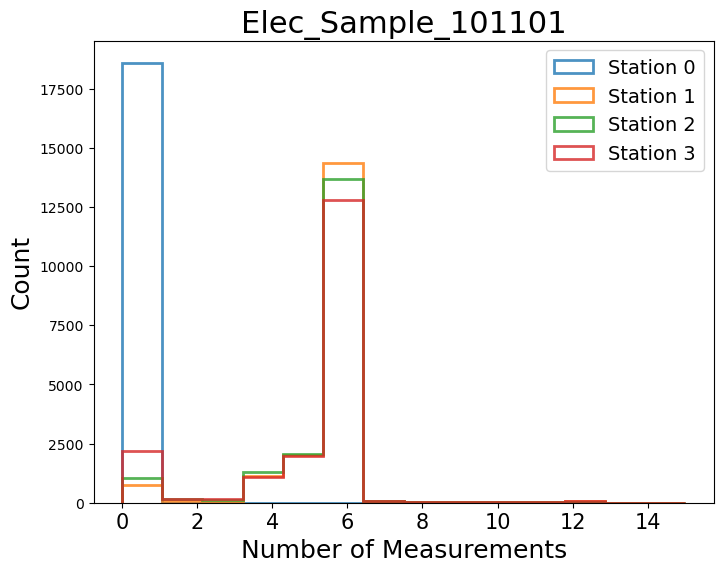

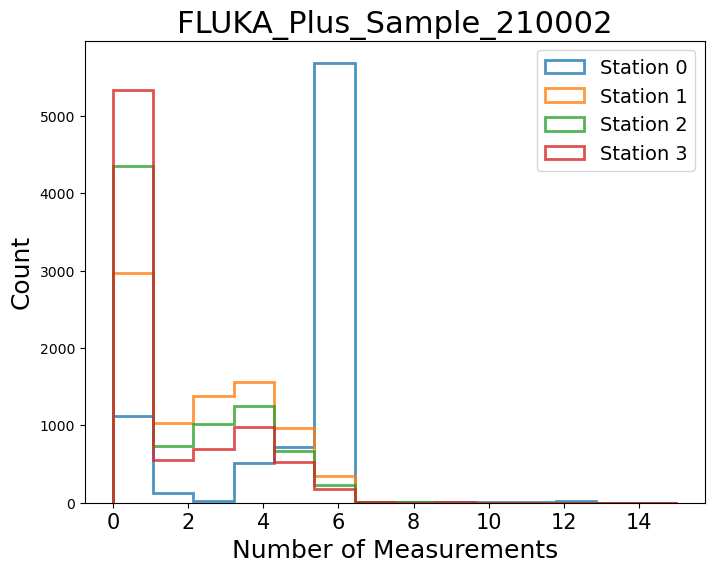

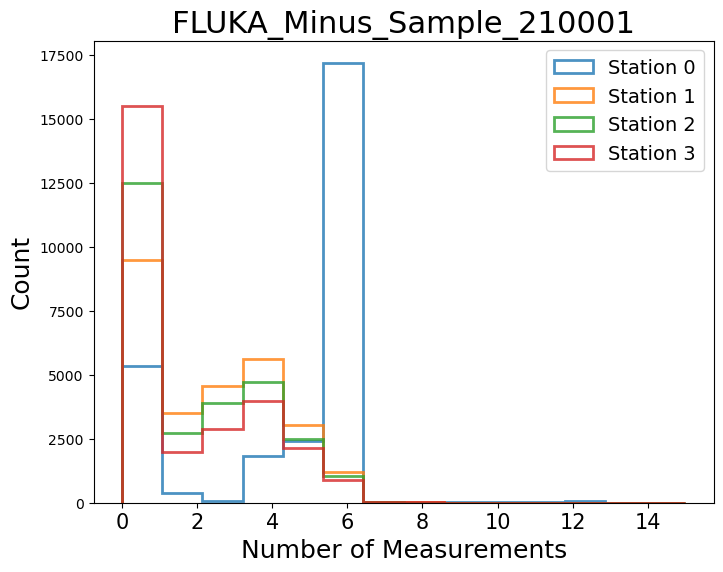

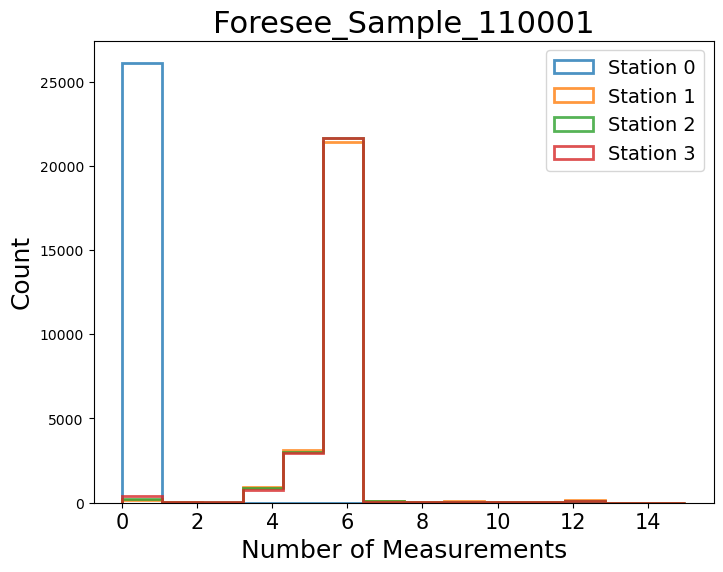

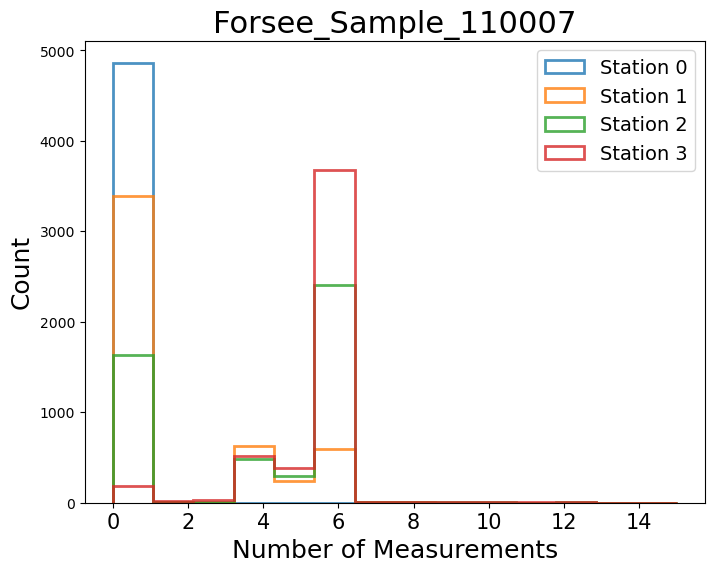

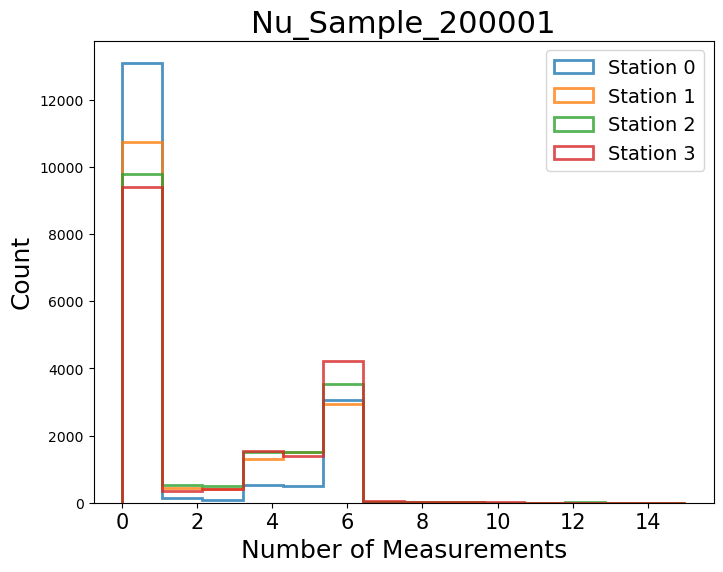

In [36]:
list_of_sample = [Muon_Sample_101302, Muon_Sample_101301, Elec_Sample_101101, FLUKA_Plus_Sample_210002, FLUKA_Minus_Sample_210001, Foresee_Sample_110001, Forsee_Sample_110007, Nu_Sample_200001]
#list_of_sample = [Muon_Sample_101302]
for i in list_of_sample:
    plot(i)

In [33]:
def angle_plot(sample):
    plt.figure(figsize=(10, 4))   
    bin = np.linspace(-0.05, 0.05, 101)
    plt.subplots_adjust(hspace=0.3, wspace=0.6)

    plt.subplot(1, 2, 1)    
    plt.hist(ak.flatten(sample['px'])/ak.flatten(sample['pz']), histtype='step', bins=bin, linewidth=2, alpha=0.8)
    plt.xlabel('Tx', fontsize=18)
    # plt.ylabel('Count', fontsize=18)
    plt.title(namestr(sample,  globals())[0], fontsize=15)
    
    plt.subplot(1, 2, 2)
    plt.hist(ak.flatten(sample['py'])/ak.flatten(sample['pz']), histtype='step', bins=bin, linewidth=2, alpha=0.8)
    plt.xlabel('Ty', fontsize=18)
    # plt.ylabel('Count', fontsize=18)
    plt.title(namestr(sample,  globals())[0], fontsize=15)

    plt.show()

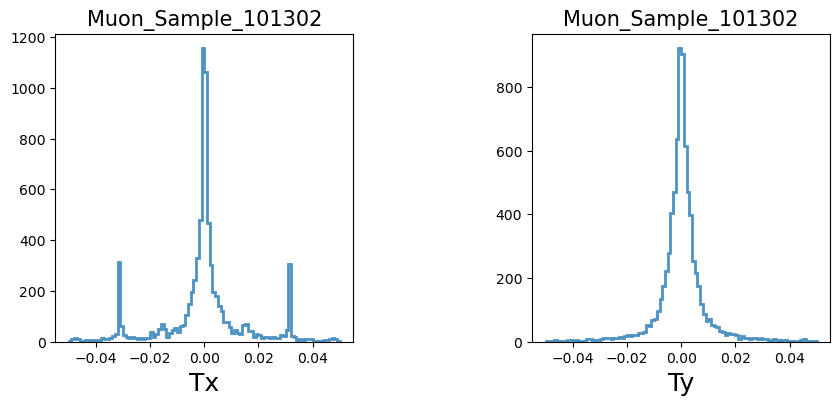

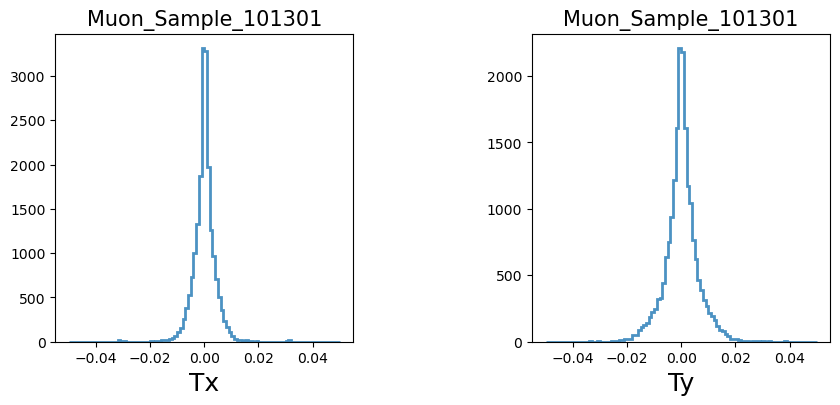

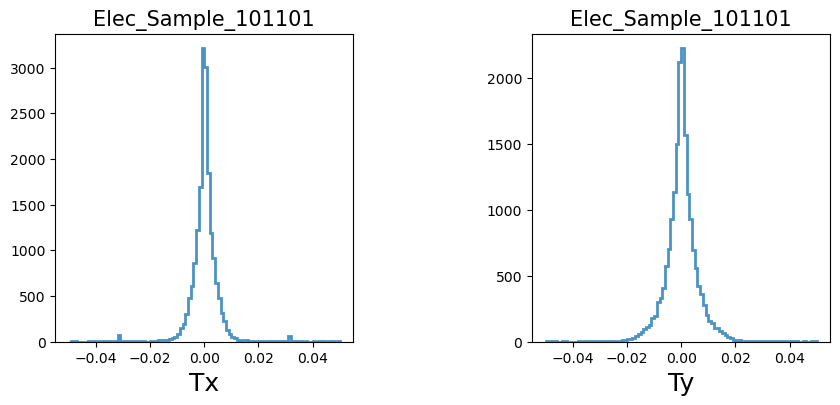

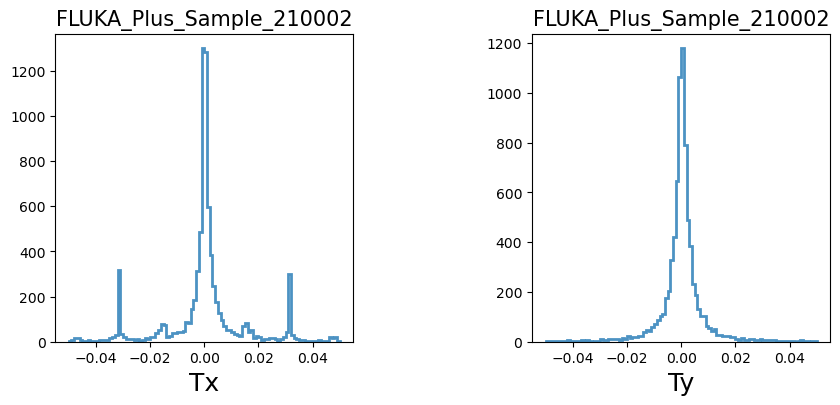

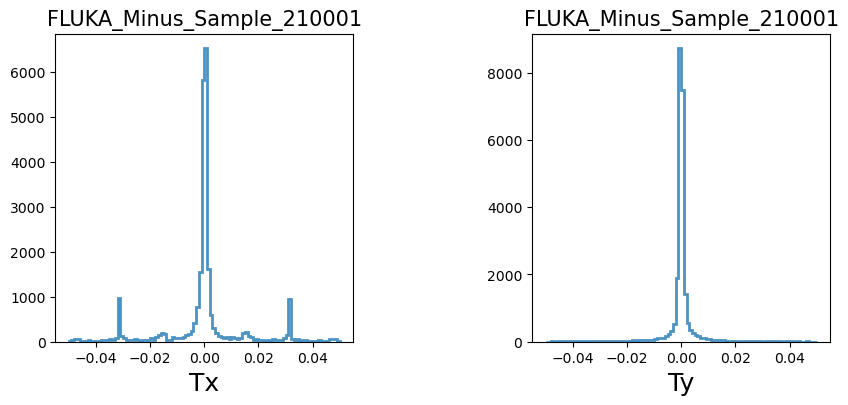

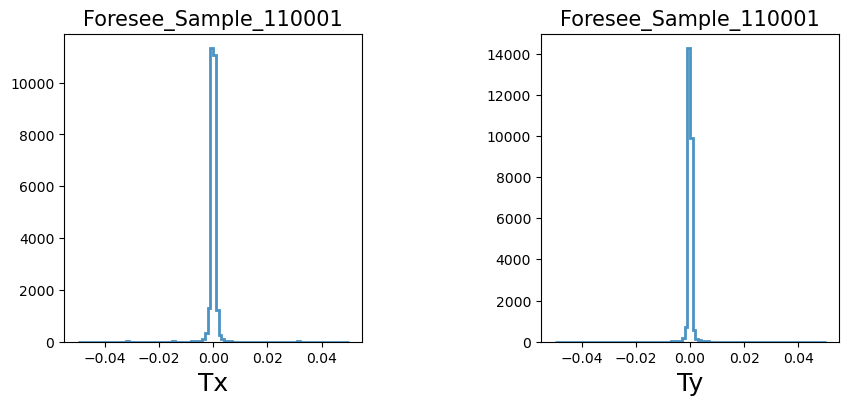

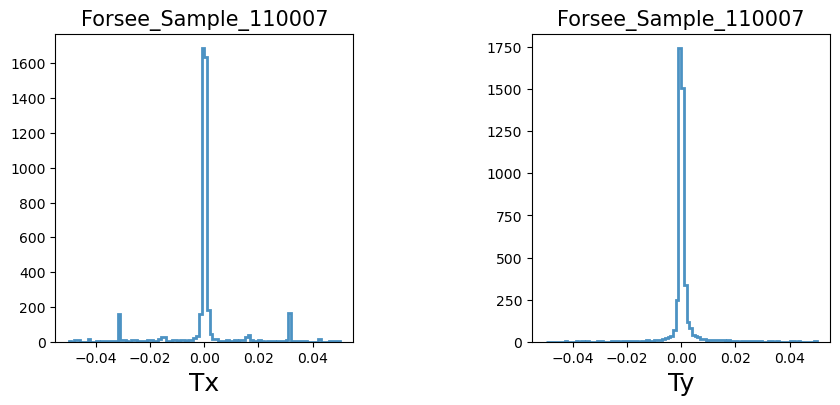

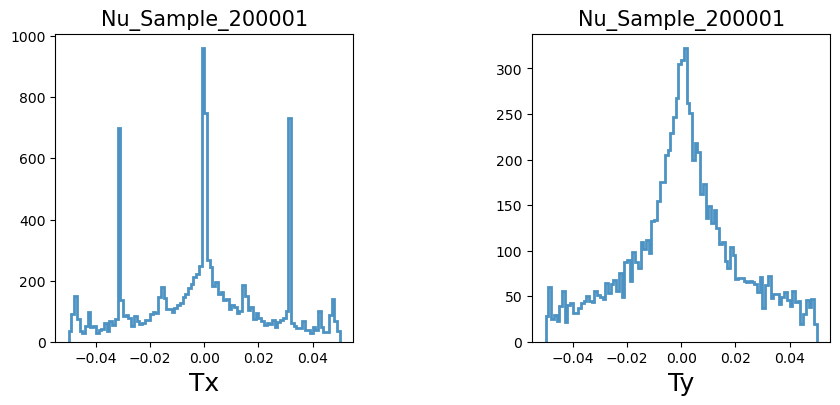

In [34]:
list_of_sample = [Muon_Sample_101302, Muon_Sample_101301, Elec_Sample_101101, FLUKA_Plus_Sample_210002, FLUKA_Minus_Sample_210001, Foresee_Sample_110001, Forsee_Sample_110007, Nu_Sample_200001]
for i in list_of_sample:
    angle_plot(i)

In [62]:
def cutting(data):
    p = np.sqrt(ak.flatten(data['px'])**2 + ak.flatten(data['py'])**2 + ak.flatten(data['pz'])**2)
    tx = ak.flatten(data['px'])/ak.flatten(data['pz'])
    ty = ak.flatten(data['py'])/ak.flatten(data['pz'])
    cut = ak.where((abs(tx)<0.01)&(abs(ty)<0.01))
    return cut

In [63]:
def cut_plot(sample):
    plt.figure(figsize=(8, 6))
    bin=np.linspace(0, 15, 15)
    plt.hist(ak.flatten(sample['nclus0'])[cutting(sample)], histtype='step', bins=bin, linewidth=2, alpha=0.8,  label="Station 0")
    plt.hist(ak.flatten(sample['nclus1'])[cutting(sample)], histtype='step', bins=bin, linewidth=2, alpha=0.8,  label="Station 1")
    plt.hist(ak.flatten(sample['nclus2'])[cutting(sample)], histtype='step', bins=bin, linewidth=2, alpha=0.8,  label="Station 2")
    plt.hist(ak.flatten(sample['nclus3'])[cutting(sample)], histtype='step', bins=bin, linewidth=2, alpha=0.8,  label="Station 3")
    # plt.hist(ak.flatten(sample['nclus']), histtype='step', bins=bin, linewidth=2, alpha=0.8,  label="Sum")

    plt.xlabel('Number of Measurements', fontsize=18)
    plt.ylabel('Count', fontsize=18)
    plt.legend(fontsize=14)
    plt.xticks(fontsize=15)
    plt.title(namestr(sample,  globals())[0], fontsize=22)
    plt.show()

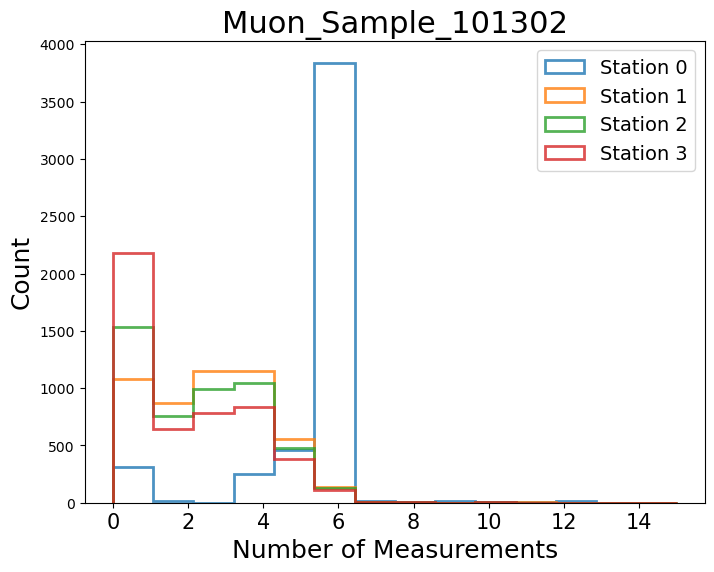

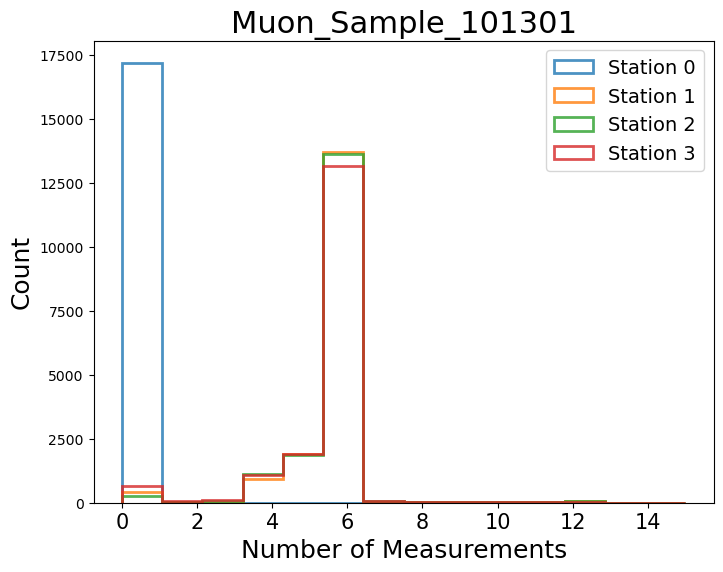

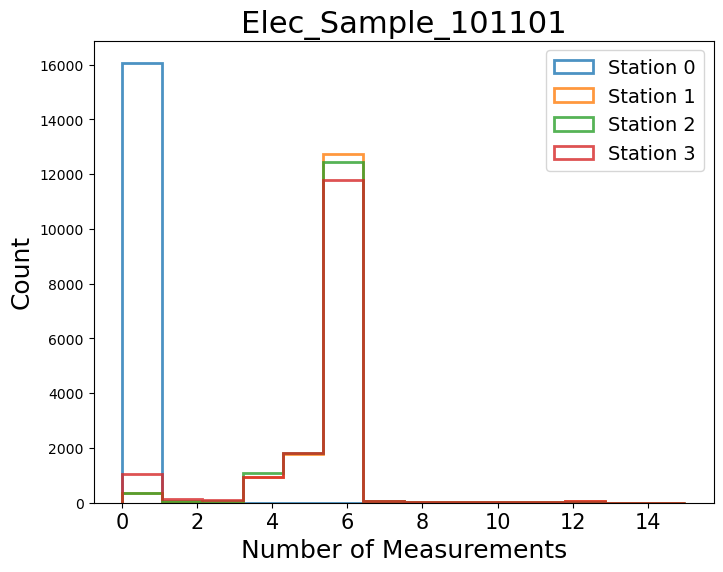

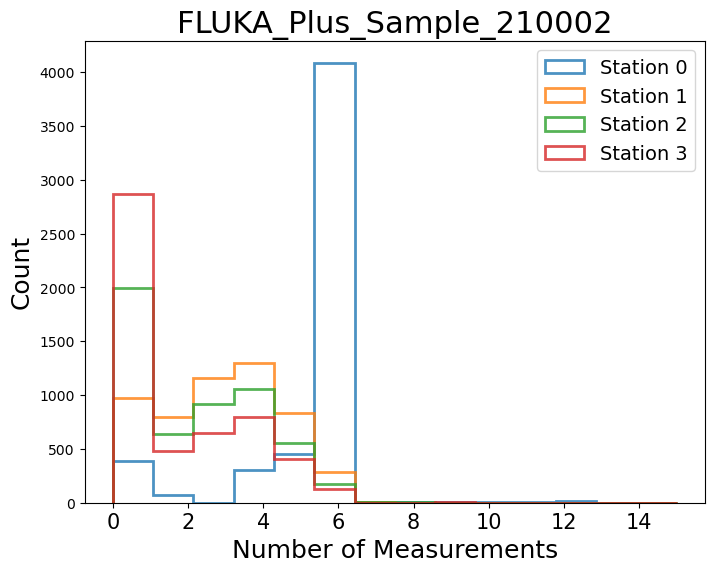

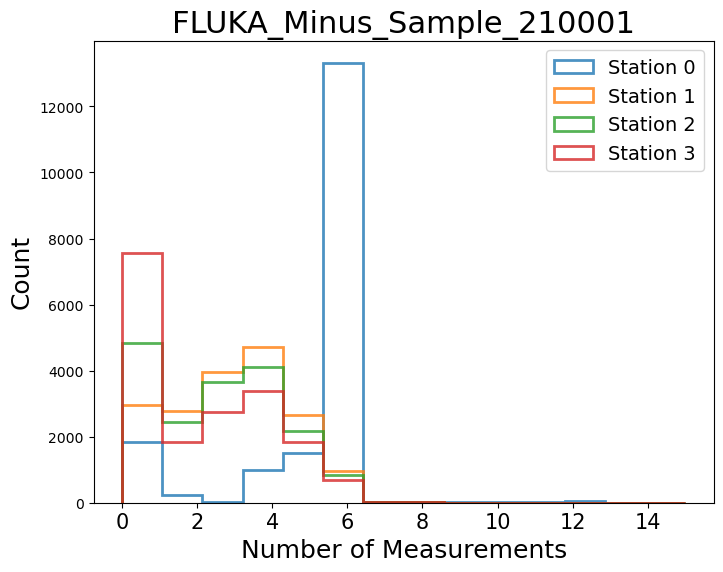

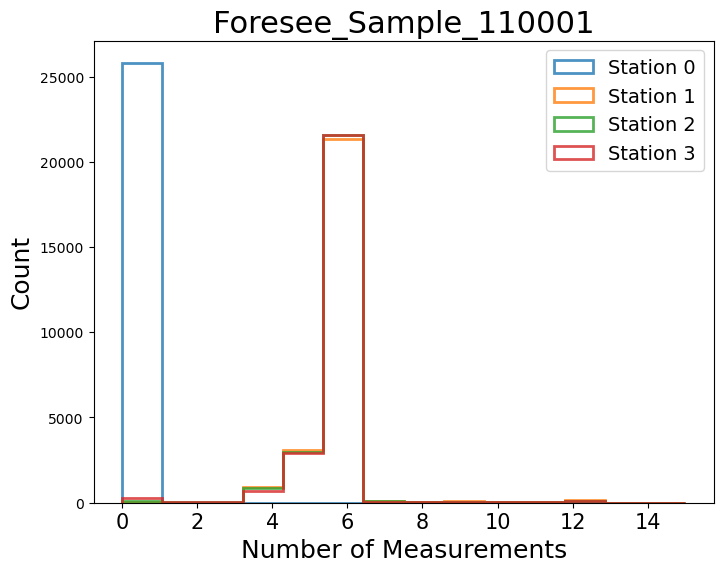

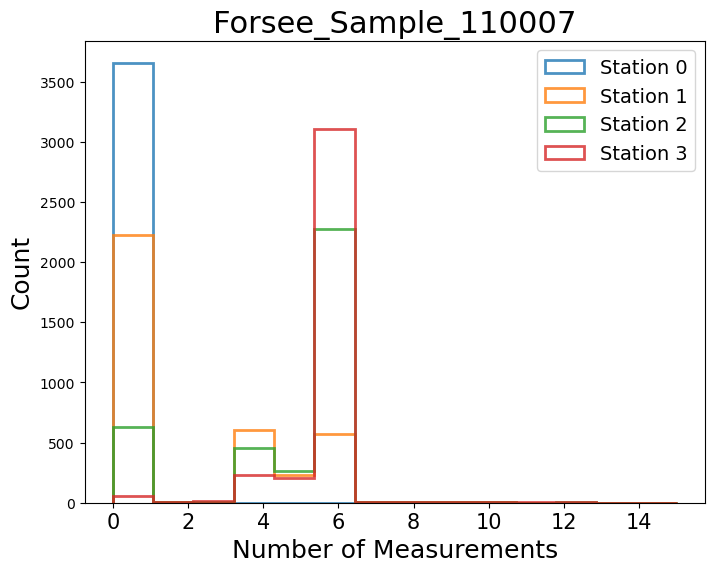

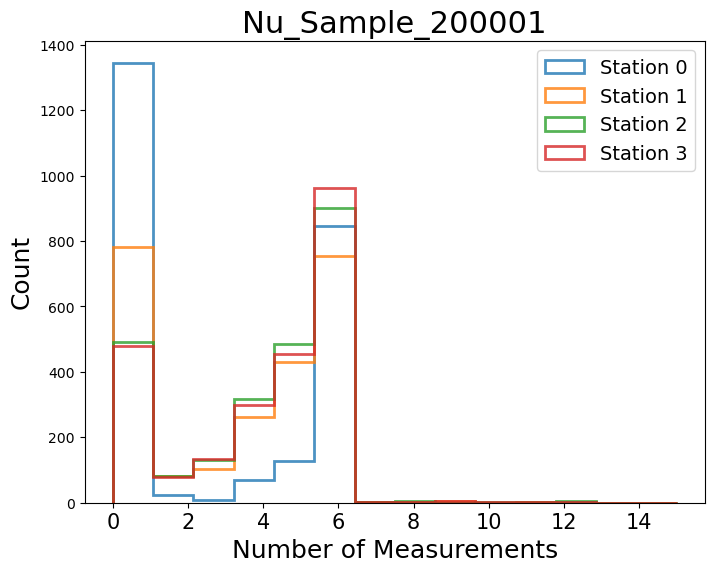

In [64]:
list_of_sample = [Muon_Sample_101302, Muon_Sample_101301, Elec_Sample_101101, FLUKA_Plus_Sample_210002, FLUKA_Minus_Sample_210001, Foresee_Sample_110001, Forsee_Sample_110007, Nu_Sample_200001]
for i in list_of_sample:
    cut_plot(i)